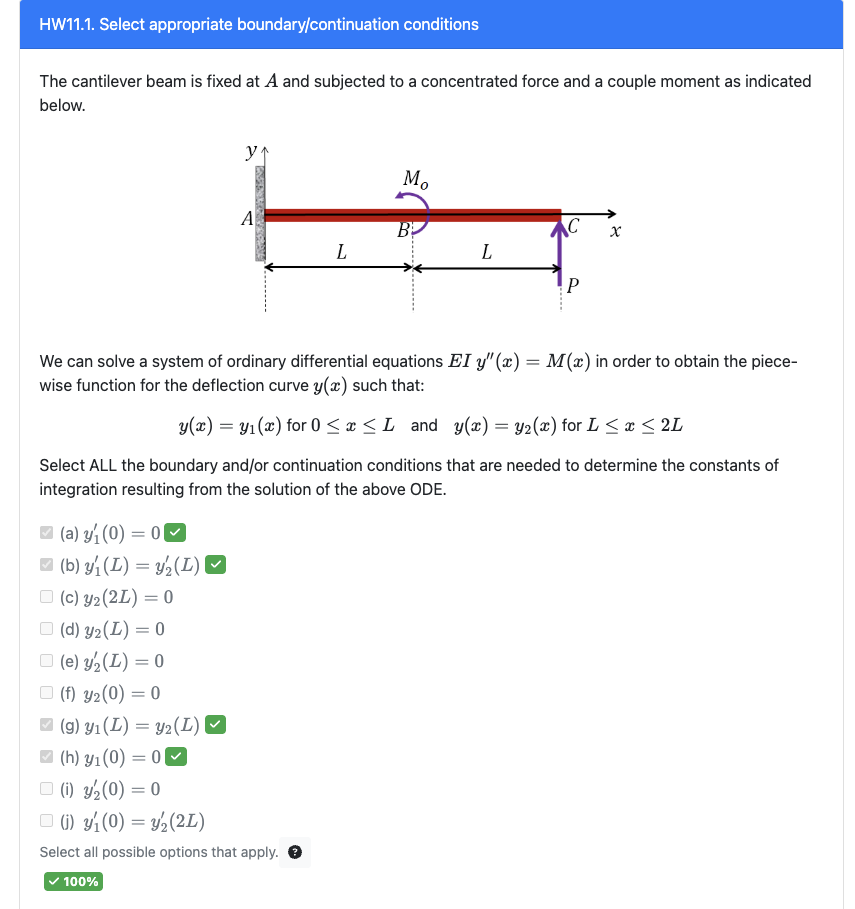

In [2]:
# 1
#HW11_1:
#pass
#边界条件：位移为0：y1(0)=0；转角为0：y1'(0)=0
#连续条件：位移连续：y1(L)=y2(L)；转角连续：y1'(L)=y2'(L)

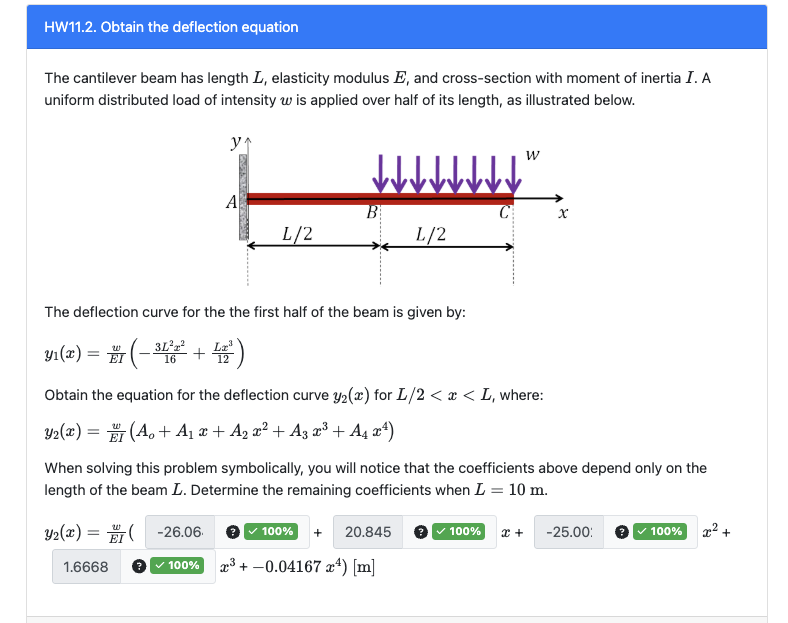

In [ ]:
# 2
#HW11_2:
from sympy import *

x = symbols('x')
L = 10

w,E,I = symbols('w E I')

y1 = (w/E/I)*(-3*L**2*x**2/16 + L*x**3/12)
A0, A1, A2, A3, A4 = symbols('A0 A1 A2 A3 A4')
y2 = (w/E/I)*(A0 + A1*x + A2*x**2 + A3*x**3 + (-0.04167)*x**4)

y2_prime = diff(y2,x)
y1_prime = diff(y1,x)

equations = [
    y1.subs(x, L/2) - y2.subs(x, L/2),  # 连续性条件：挠度相等
    y1_prime.subs(x, L/2) - y2_prime.subs(x, L/2),  # 连续性条件：转角相等
    y2.diff(x,2).subs(x, L),  # 边界条件：在x=0处位移为零
    y2.diff(x,3).subs(x, L)   # 边界条件：在x=0处转角为零
]

solutions = solve(equations, (A0, A1, A2, A3, A4))

print(solutions)

y2_final = simplify(y2.subs(solutions))
print("后半段的挠度方程：")
print(f"y2(x) = {y2_final}")

{A0: -26.0645833333333, A1: 20.8450000000000, A2: -25.0020000000000, A3: 1.66680000000000}
后半段的挠度方程：
y2(x) = -w*(0.04167*x**4 - 1.6668*x**3 + 25.002*x**2 - 20.845*x + 26.0645833333333)/(E*I)


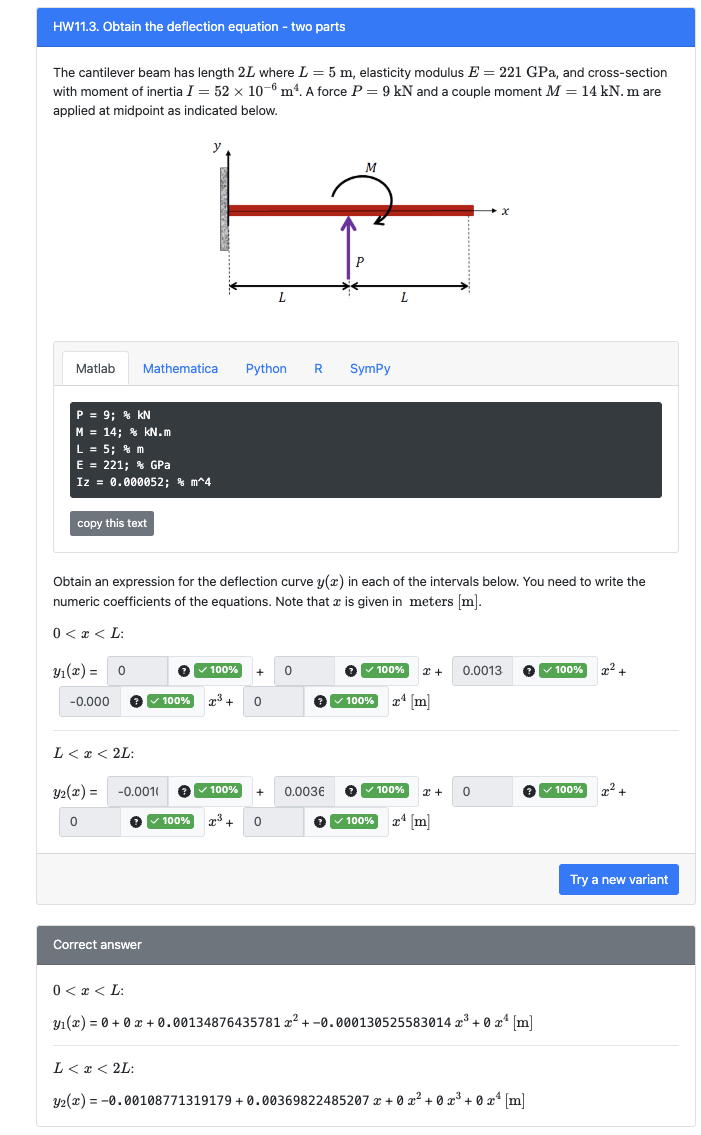

In [8]:
# 3

#HW11_3:
from sympy import *

P = 9 # kN
M = 14 # kN.m
L = 5 # m
E = 221 # GPa
Iz = 0.000052 # m^4
##############################################################

P *=1e3; M *=1e3; E *=1e9
x,y,e,i,A0,A1,A2,A3,A4 = symbols("x,y,e,i,A0,A1,A2,A3,A4")

# 解0 < x < L
M1 = (P*L-M)-(x*P)
Mi = M1.subs(x,0)
Pi = -P
y1 = A0+A1*x+A2*x**2+A3*x**3+A4*x**4
y1_prime1 = y1.diff(x,1)
y1_prime2 = y1.diff(x,2)
y1_prime3 = y1.diff(x,3)
y1_prime4 = y1.diff(x,4)
eq1 = [
    E*Iz*y1_prime2 - M1,           #力矩平衡方程
    E*Iz*y1_prime2.subs(x,0) - Mi, #力矩方程：等于初始值
    E*Iz*y1_prime3.subs(x,0) - Pi, #剪力方程：等于初始值
    y1_prime1.subs(x,0),      #转角方程：初始为0
    y1.subs(x,0),             #挠度方程：初始为0
    E*Iz*y1_prime4.subs(x,0)       #荷载方程：初始为0
]
ans = solve(eq1,[x,A0,A1,A2,A3,A4])
a0 = ans[0][1]; a1 = ans[0][2]; a2 = ans[0][3]; a3 = ans[0][4]; a4 = ans[0][5]
print("系数",a0,a1,a2,a3,a4) 
y1 = y1.subs(A0,a0).subs(A1,a1).subs(A2,a2).subs(A3,a3).subs(A4,a4)
y1_prime1 = y1.diff(x,1)
y1_prime2 = y1.diff(x,2)
y1_prime3 = y1.diff(x,3)
y1_prime4 = y1.diff(x,4)

# 解L < x < 2L
M2 = 0
Mi = 0
Pi = 0
vi = y1.subs(x,L)
ti = y1_prime1.subs(x,L)
x,y,e,i,A0,A1,A2,A3,A4 = symbols("x,y,e,i,A0,A1,A2,A3,A4")
y2 = A0+A1*x+A2*x**2+A3*x**3+A4*x**4
y2_prime1 = y2.diff(x,1)  #转角
y2_prime2 = y2.diff(x,2)  #力矩
y2_prime3 = y2.diff(x,3)  #剪力
y2_prime4 = y2.diff(x,4)  #荷载
eq2 = [
    E*Iz*y2_prime2,           #力矩平衡方程
    E*Iz*y2_prime2.subs(x,L), #力矩方程：等于初始值
    E*Iz*y2_prime3.subs(x,L), #剪力方程：等于初始值
    y2_prime1.subs(x,L) - ti, #转角方程：初始值为上一段结束值
    y2.subs(x,L) - vi,        #挠度方程：初始值为上一段结束值
    E*Iz*y2_prime4.subs(x,L)  #荷载方程：初始为0
]
ans = solve(eq2,[x,A0,A1,A2,A3,A4])
a0 = ans[0][1]; a1 = ans[0][2]; a2 = ans[0][3]; a3 = ans[0][4]; a4 = ans[0][5]
print("系数",a0,a1,a2,a3,a4) 

系数 0.0 0.0 0.00134876435781413 -0.000130525583014271 0.0
系数 -0.00108771319178565 0.00369822485207101 0.0 0.0 0.0


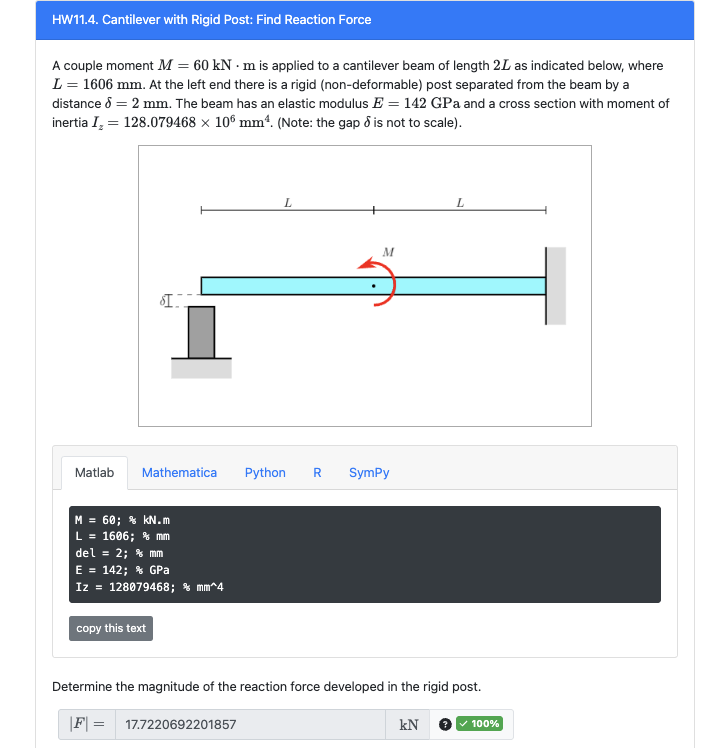

In [13]:
# 4

#HW11_4:
from sympy import *

M = 60 # kN.m
L = 1606 # mm
delt= 2 # mm
E = 142 # GPa
Iz = 128079468 # mm^4

######################

M *=1e3; L *=1e-3; delt *=1e-3; E *=1e9; Iz *=1e-12
F = symbols('F')
yb = -M*L**2/(2*E*Iz)
tb = -M*L/(E*Iz)
yc_1 = yb + L*tan(tb)
yc_2 = F*(2*L)**3/(3*E*Iz)
eq = yc_1 + yc_2 + delt
ans = solve(eq,F)
print("F:",ans[0]/1e3)

F: 17.7220692201857


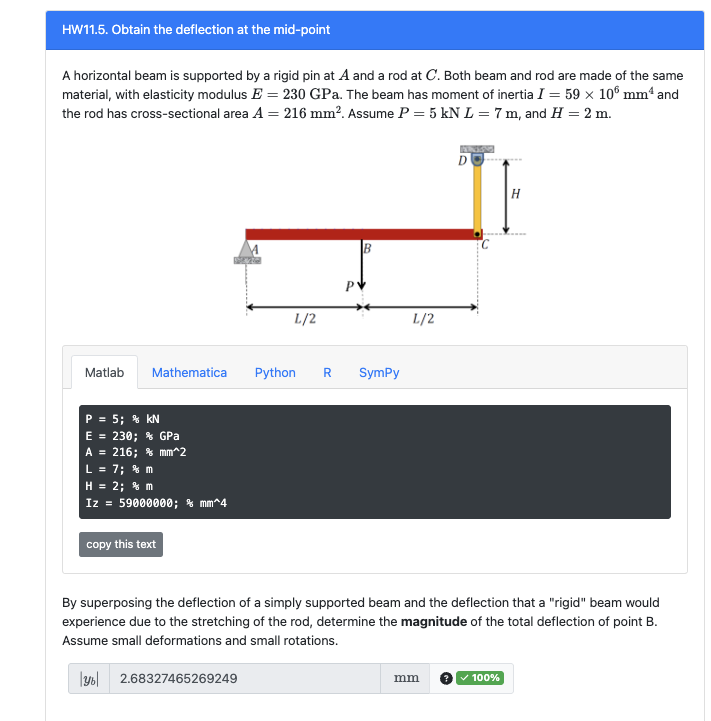

In [14]:
#HW11_5:
from sympy import *

P = 5 # kN
E = 230 # GPa
A = 216 # mm^2
L = 7 # m
H = 2 # m
Iz = 59000000 # mm^4

######################

P *=1e3; E *=1e9; A *=1e-6; Iz *=1e-12

Fc = P/2
sigmaC = Fc/A; epsC = sigmaC/E
deltaC = epsC*H
print("C点下移：",deltaC*1e3,'mm')

yb = -P*(L)**3/(48*E*Iz)
print("B点挠度：",yb*1e3,'mm')
print("Yb:",(Abs(yb)+deltaC/2)*1e3)

C点下移： 0.10064412238325282 mm
B点挠度： -2.63295259150086 mm
Yb: 2.68327465269249


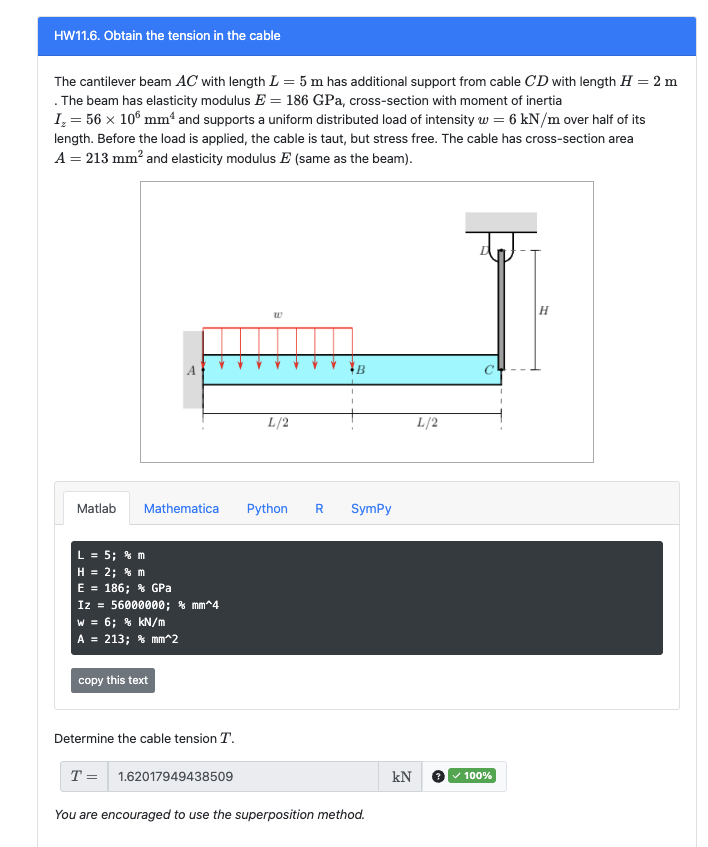

In [17]:
#HW11_6:
from sympy import *

L = 5 # m
H = 2 # m
E = 186 # GPa
Iz = 56000000 # mm^4
w = 6 # kN/m
A = 213 # mm^2
####################
E *=1e9; Iz *=1e-12; w *=1e3; A *=1e-6

deltC = symbols('deltC')
epsC = deltC/H; sigmaC = epsC*E
Fc = sigmaC*A

yb = w*(L/2)**4/(8*E*Iz)
tb = w*(L/2)**3/(6*E*Iz)
yc_1 = yb + (L/2)*tan(tb)
yc_2 = Fc*L**3/(3*E*Iz)

eq = (yc_1 - yc_2) - (deltC)
ans = solve(eq,deltC)
# print("C点位移：",ans[0]*1e3)
Fc = Fc.subs(deltC,ans[0])
print("T：",Fc/1e3)

T： 1.62017949438509


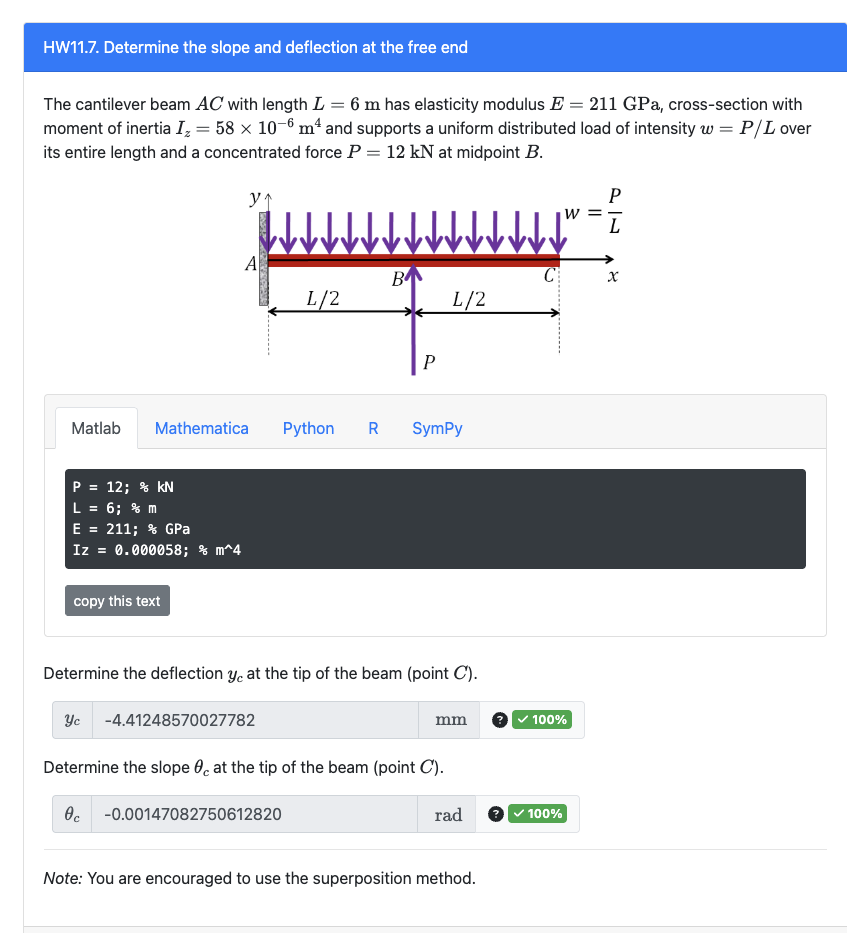

In [16]:
# 11.7
from sympy import *

P = 12 # kN
L = 6 # m
E = 211 # GPa
Iz = 0.000058 # m^4
########################复制部分
mm=1e-3
P*=1000
E*=1e9
w=P/L

yb1=P*(L/2)**3/(3*E*Iz)
t1=P*(L/2)**2/(2*E*Iz)

yc1=tan(t1)*1/2*L+yb1

yc2=-w*(L)**4/(8*E*Iz)
t2=-w*(L)**3/(6*E*Iz)


print((yc1+yc2)*1e3)
print((t1+t2))


-4.41239978837954
-0.0014708285667592745


In [ ]:
# 11.7 法二

from sympy import *

P = 12 # kN
L = 6 # m
E = 211 # GPa
Iz = 0.000058 # m^4
########################复制部分
mm=1e-3
P*=1000
E*=1e9
w=P/L

w=P/L

F,M,x,c1,c0=S("F,M,x,c1,c0")


y1=(-M/2*x**2+F/6*x**3-w/24*x**4+c1*x+c0)/(E*Iz)
y2=(-M/2*x**2+F/6*x**3-w/24*x**4+P/6*(x-L/2)**3+c1*x+c0)/(E*Iz)



t1=y1.diff(x,1)
q1=y1.subs(x,0)
q2=t1.subs(x,0)
q3=y1.subs(x,1/2*L)-y2.subs(x,1/2*L)

q4=M-1/2*L*w*L+P*1/2*L
q5=P+F-w*L

ans=solve([q1,q2,q3,q4,q5],[F,M,x,c1,c0])

print(ans)
F=ans[F]
M=ans[M]
c1=ans[c1]
c0=ans[c0]




y2=(-M/2*x**2+F/6*x**3-w/24*x**4+P/6*(x-L/2)**3+c1*x+c0)/(E*Iz)
t2=y2.diff(x,1)
t2=t2.subs(x,L)


print(y2.subs(x,L)*1e3)
print(t2)


{F: 0.0, M: 0.0, c0: 0.0, c1: 0.0}
-4.41248570027782
-0.00147082856675927


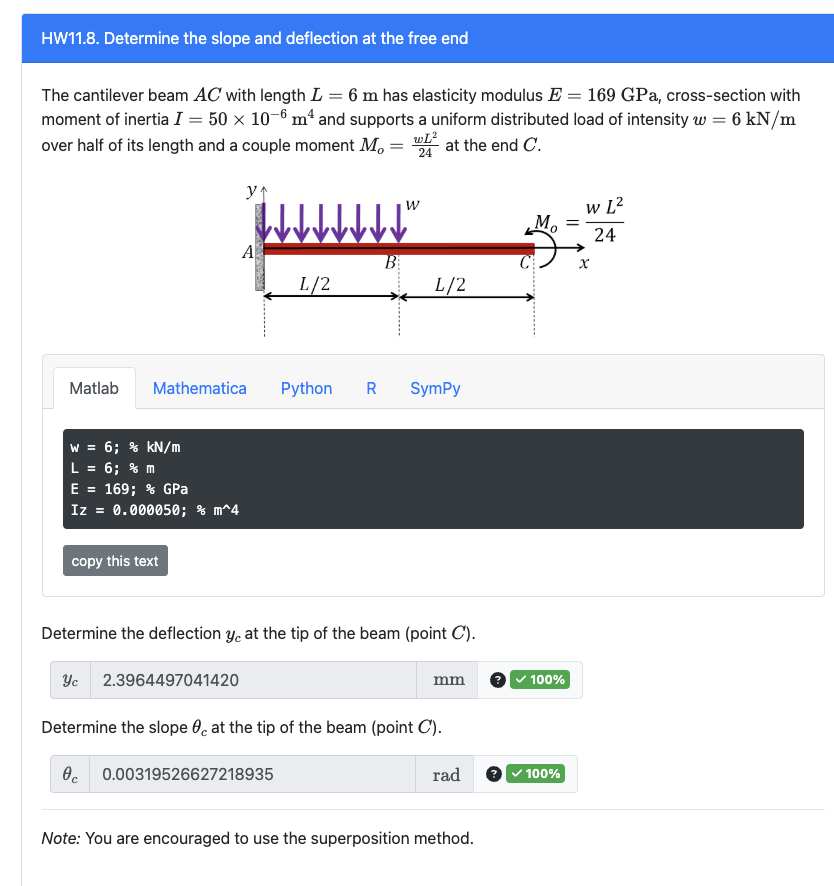

In [ ]:
# 11.8
from sympy import *

w = 6 # kN/m
L = 6 # m
E = 169 # GPa
Iz = 0.000050 # m^4
####################复制部分

w*=1000;E*=1e9;I=Iz;M0=w*L**2/24



F,M,c0,c1,x=S("F,M,c0,c1,x")

y1=(F/6*x**3-w/24*x**4-M/2*x**2+c1*x+c0)/(E*Iz)
y2=(F/6*x**3-w/24*x**4-M/2*x**2+c1*x+c0+w/24*(x-L/2)**4)/(E*Iz)

t1=y1.diff(x,1)

q1=t1.subs(x,0)
q2=y1.subs(x,0)
q3=y1.subs(x,1/2*L)-y2.subs(x,1/2*L)
q4=M-(1/4*L)*(w*1/2*L)+M0
q5=F-w*1/2*L

ans=solve([q1,q2,q3,q4,q5],[F,M,x,c1,c0])

# print(ans)
F=ans[F]
M=ans[M]
c1=ans[c1]
c0=ans[c0]

y2=(F/6*x**3-w/24*x**4+-M/2*x**2+c1*x+c0+w/24*(x-L/2)**4)/(E*Iz)
t2=y2.diff(x,1)

print(y2.subs(x,L)*1e3)
print(t2.subs(x,L))


2.39644970414202
0.00319526627218935


In [2]:
# 8
from sympy import *

w = 6 # kN/m
L = 6 # m
E = 169 # GPa
Iz = 0.000050 # m^4
####################复制部分

mm=0.001
w*=1000;E*=1e9;I=Iz;M=w*L**2/24


x=S('x')

def yw(w,L,E,I):
    x=S('x')
    return -w/(24*E*I)*(x**4-4*L*x**3+6*L**2*x**2)

def yf(f,L,E,I):
    x=S('x')
    return f/(6*E*I)*(x**3-3*L*x**2)

def ym(M,L,E,I):
    return -M/(2*E*I)*x**2

def yf_2pin(f,L,E,I): #L是两端点之间的距离
    return f/(48*E*I)*(4*x**3-3*L**2*x)

def yw_2pin(w,L,E,I): #L是两端点之间的距离
    return -w/(24*E*I)*(x**4-2*L*x**3+L**3*x)


w1=w
L1=0.5*L

y11=yw(w1,L1,E,I)

h=diff(y11,x,0).subs(x,L1)
k=diff(y11,x,1).subs(x,L1)
y12=h+k*(x-L1)
y1=y12


#M产生的
M2=-M
L2=L
y2=ym(M2,L2,E,I)

y=y1+y2

delta=diff(y,x,0).subs(x,L)
theta=diff(y,x,1).subs(x,L)

delta/mm,theta



(2.39644970414201, 0.00319526627218935)

In [22]:
#HW11_8:
from sympy import *

w = 10 # kN/m
L = 8 # m
E = 173 # GPa
Iz = 0.000057 # m^4

w *=1e3; E *=1e9; M = w*L**2/24

yb = -w*(L/2)**4/(8*E*Iz)
tb = -w*(L/2)**3/(6*E*Iz)
print("荷载造成的B点挠度和转角：",yb,tb)
yc_1 = yb + (L/2)*tan(tb)
tc_1 = tb
print("等效C点挠度和转角：",yc_1,tc_1)
yc_2 = M*L**2/(2*E*Iz)
tc_2 = M*L/(E*Iz)
print("扭矩造成的C点挠度和转角：",yc_2,tc_2)
print("最终挠度",(yc_1+yc_2)*1e3)
print("最终转角",tc_1+tc_2)


荷载造成的B点挠度和转角： -0.03245106987120982 -0.010817023290403273
等效C点挠度和转角： -0.0757208506827223 -0.010817023290403273
扭矩造成的C点挠度和转角： 0.08653618632322618 0.021634046580806546
最终挠度 10.8153356405038
最终转角 0.010817023290403273


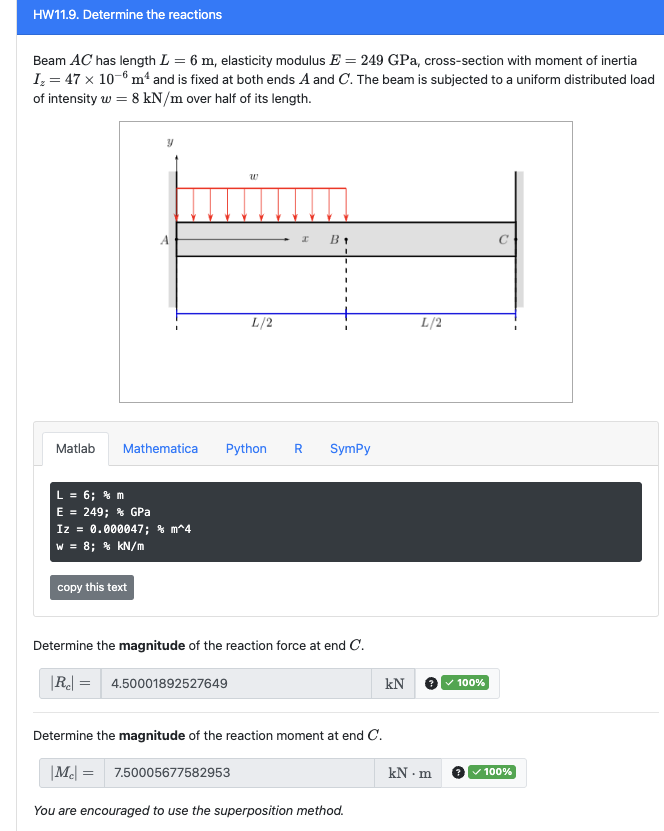

In [25]:
#HW11_9:
from sympy import *

L = 6 # m
E = 249 # GPa
Iz = 0.000047 # m^4
w = 8 # kN/m
##########################

E *=1e9; w *=1e3

Fc,Mc,dis = symbols('Fc,Mc,dis')

yb = -w*(L/2)**4/(8*E*Iz)
tb = -w*(L/2)**3/(6*E*Iz)
print("荷载造成的B点挠度和转角：",yb,tb)
yc_1 = yb + (L/2)*tan(tb)
tc_1 = tb
print("等效C点挠度和转角：",yc_1,tc_1)
yc_2 = Fc*L**3/(3*E*Iz)
tc_2 = Fc*L**2/(2*E*Iz)
yc_3 = Mc*L**2/(2*E*Iz)
tc_3 = Mc*L/(E*Iz)
eq1 = yc_2 + yc_1 + yc_3
eq2 = tc_2 + tc_1 + tc_3
ans = solve([eq1,eq2],[Fc,Mc])
print('Rc:',Abs(ans[Fc]/1e3),'Mc:',Abs(ans[Mc]/1e3))


荷载造成的B点挠度和转角： -0.006921302230197385 -0.0030761343245321714
等效C点挠度和转角： -0.0161497343121401 -0.0030761343245321714
Rc: 4.50001892527649 Mc: 7.50005677582953


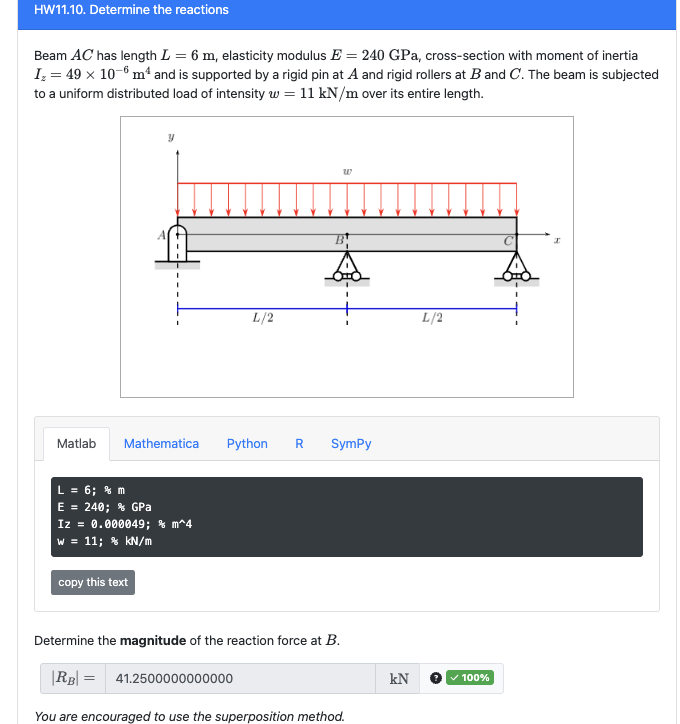

In [ ]:
#

In [ ]:
#HW11_10:
from sympy import *

L = 6 # m
E = 240 # GPa
Iz = 0.000049 # m^4
w = 11 # kN/m
##############################

E *=1e9; w *=1e3

Fb = symbols('Fb')
yb_1 = 5*w*L**4/(384*E*Iz)
yb_2 = Fb*L**3/(48*E*Iz)
eq = yb_1 - yb_2
ans = solve(eq,Fb)
print("Rb:",ans[0]/1e3)

Rb: 41.2500000000000


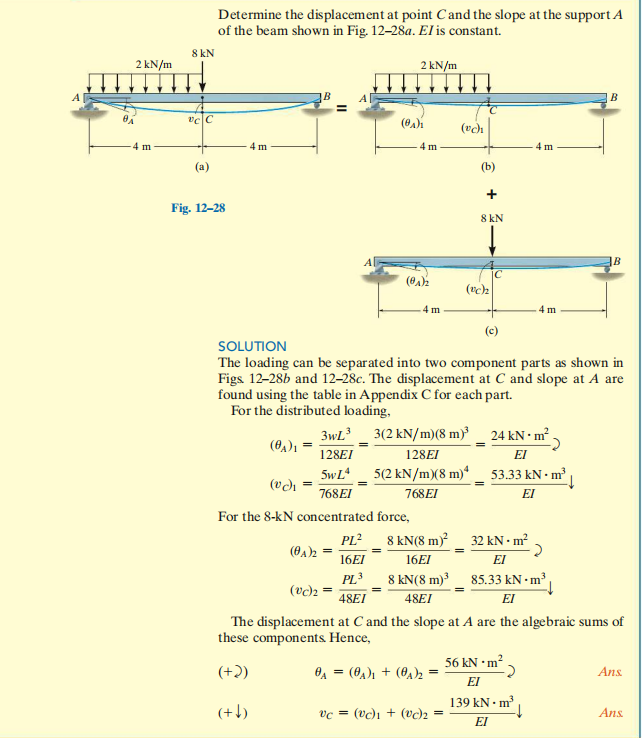

In [ ]:
# 一道例题
from sympy import *

P=8
w=2
L=8

F1,F2,M,c0,c1,x=S('F1,F2,M,c0,c1,x')

y1=(F1/6*x**3-M/2*x**3-w/24*x**4+c0*x+c1)
y2=(F1/6*x**3-M/2*x**3-w/24*x**4+w/24*(x-L/2)**4-P/6*(x-L/2)**3+c0*x+c1)
t1=y1.diff(x,1)


q1=y1.subs(x,0)
q2=y2.subs(x,L)


q3=F1+F2-w*L/2-P
q4=M-w*L/2*L/4-P*L/2+F2*L
q5=M


ans=solve([q1,q2,q3,q4,q5],[F1,F2,M,c0,c1])

F1=ans[F1]
F2=ans[F2]
M=ans[M]
c0=ans[c0]
c1=ans[c1]

print(ans)
y1=(F1/6*x**3-M/2*x**3-w/24*x**4+c0*x+c1)
y2=(F1/6*x**3-M/2*x**3-w/24*x**4+w/24*(x-L/2)**4-P/6*(x-L/2)**3+c0*x+c1)
t1=y1.diff(x,1)




# t1.subs(x,0)
# y1.subs(x,L/2)



{F1: 10.0000000000000, F2: 6.00000000000000, M: 0.0, c0: -56.0000000000000, c1: 0.0}


-138.666666666667